In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

## É possível predizer quantas estrelas foram dadas em um review de uma empresa com base no texto de comentário ?

In [2]:
%%time
json_size = 2000000
for _json in pd.read_json('yelp_academic_dataset_review.json', chunksize=json_size, lines=True):
    reviews = _json
    break

CPU times: user 52.6 s, sys: 10.5 s, total: 1min 3s
Wall time: 1min 3s


In [3]:
%%time
print len(reviews)
business = pd.read_json('yelp_academic_dataset_business.json', lines=True)
columns_to_stay = ['business_id','name','stars']
business = business[columns_to_stay]
business.head()

2000000
CPU times: user 11.9 s, sys: 166 ms, total: 12.1 s
Wall time: 12 s


In [36]:
%%time
dataset = reviews.merge(business,how='left', on='business_id')
dataset.rename({'stars_x':'review stars', 'stars_y':'business stars'},inplace=True, axis='columns')
dataset_columns_to_stay = ['name','business_id','text','review stars','business stars','cool',  'useful', 'funny']
dataset = dataset[dataset_columns_to_stay]
#dataset.to_json('dataset.json')
dataset.head()

CPU times: user 5.21 s, sys: 438 ms, total: 5.65 s
Wall time: 5.65 s


### Verificando correlação das features com a feature target
- Observa-se que a única coluna que tem grande correlação é a business star, contudo ela é inviesada por ser a média de todas as reviews stars. 

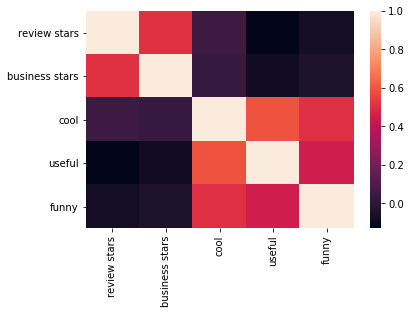

In [16]:
sns.heatmap(dataset.corr())

### Verificando integridade dos dados
- Verificar se existe alguma coluna nula
- Verificar o mínimo e máximo dos valores das features
- Dropar, se pertinente, textos incoerentes

In [17]:
dataset[dataset.isnull().any(axis=1)].shape

(0, 8)

In [18]:
dataset.text.str.len().min()

4

In [19]:
dataset.text.str.len().max()

5000

In [37]:
dataset[(dataset.text.str.len() < 4 )].count()

name              18
business_id       18
text              18
review stars      18
business stars    18
cool              18
useful            18
funny             18
dtype: int64

In [38]:
dataset.drop(dataset[(dataset.text.str.len() < 4 )].index,inplace=True)

In [39]:
dataset.max()

name                                            想家烤鱼吧 Tang's Garden
business_id                                  zzzaIBwimxVej4tY6qFOUQ
text              íMuy Delicioso!  My Buddy and I were looking f...
review stars                                                      5
business stars                                                    5
cool                                                            198
useful                                                          805
funny                                                           933
dtype: object

In [40]:
dataset.min()

name                                               "T"s Hair Affair
business_id                                  --1UhMGODdWsrMastO9DZw
text              !  As a korean american living in Pittsburgh, ...
review stars                                                      1
business stars                                                    1
cool                                                              0
useful                                                            0
funny                                                             0
dtype: object

### Verificando distribuição da feature target

In [6]:
starts_total = dataset.groupby('review stars')['review stars'].count()

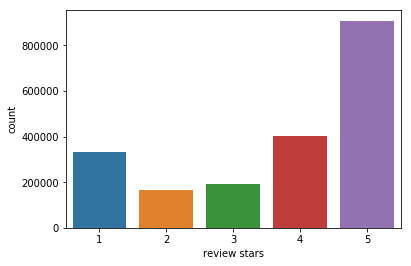

In [7]:
sns.countplot(x=dataset['review stars'], data=dataset)

### Criando WordCloud

In [8]:
%%time
all_text = " ".join(review for review in dataset.text)

CPU times: user 2.27 s, sys: 1.61 s, total: 3.88 s
Wall time: 3.89 s


In [11]:
print sum([len(review) for review in dataset.text])
print len(all_text)

1140497209
1142497190


In [12]:
%%time
wordcloud = WordCloud().generate(all_text)

CPU times: user 29min 58s, sys: 38.5 s, total: 30min 37s
Wall time: 30min 34s


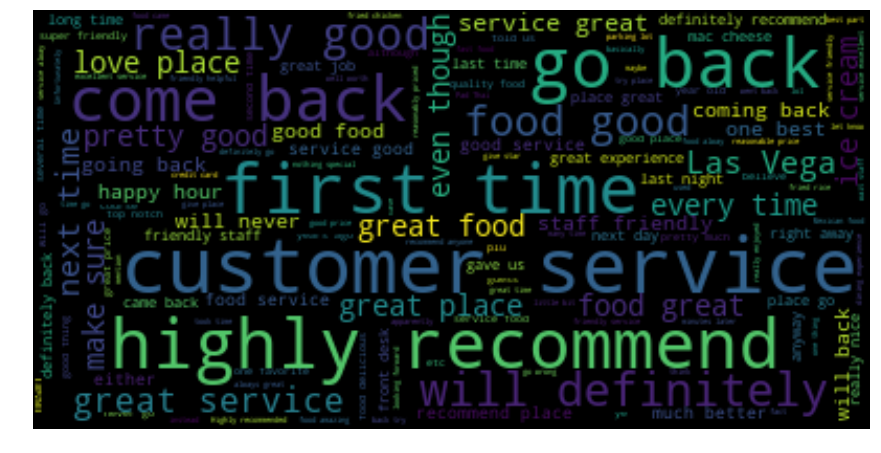

CPU times: user 798 ms, sys: 178 ms, total: 976 ms
Wall time: 706 ms


In [13]:
%%time
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### WordCloud por rating

In [15]:
%%time
texts1 = " ".join(text for text in dataset['text'][dataset['review stars'] == 1])
texts2 = " ".join(text for text in dataset['text'][dataset['review stars'] == 2])
texts3 = " ".join(text for text in dataset['text'][dataset['review stars'] == 3])
texts4 = " ".join(text for text in dataset['text'][dataset['review stars'] == 4])
texts5 = " ".join(text for text in dataset['text'][dataset['review stars'] == 5])
print len(texts1)
print len(texts2)
print len(texts3)
print len(texts4)
print len(texts5)

247821536
122101084
129735444
228630017
414209105
CPU times: user 4.01 s, sys: 1.96 s, total: 5.97 s
Wall time: 5.97 s


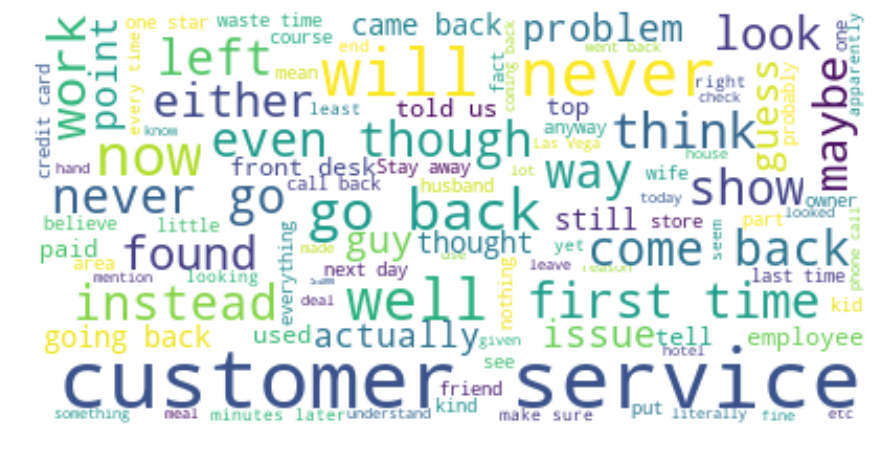

CPU times: user 6min 25s, sys: 7.69 s, total: 6min 33s
Wall time: 6min 32s


In [24]:
%%time
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(texts1)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

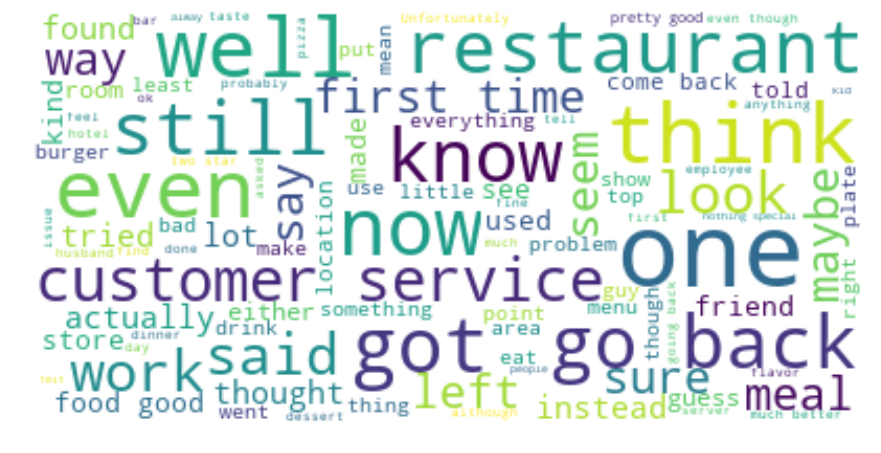

CPU times: user 3min 9s, sys: 3.82 s, total: 3min 13s
Wall time: 3min 12s


In [25]:
%%time
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(texts2)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

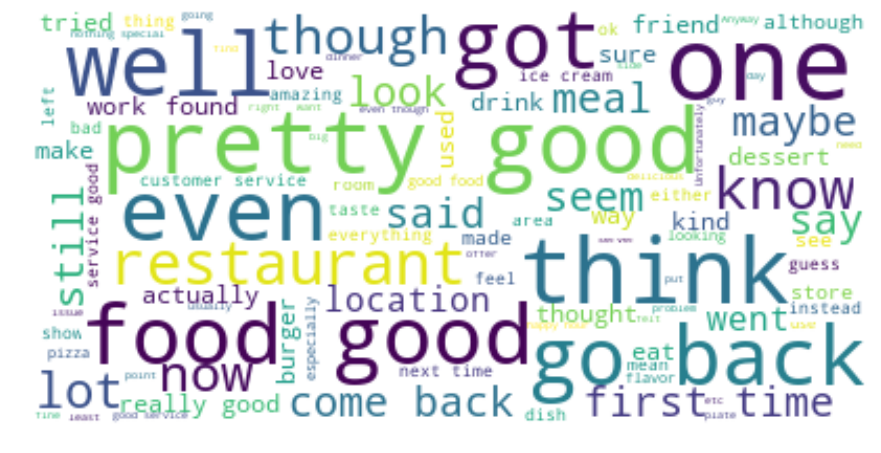

CPU times: user 4min 3s, sys: 4.3 s, total: 4min 7s
Wall time: 4min 6s


In [26]:
%%time
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(texts3)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

![title](3estrelas.PNG)

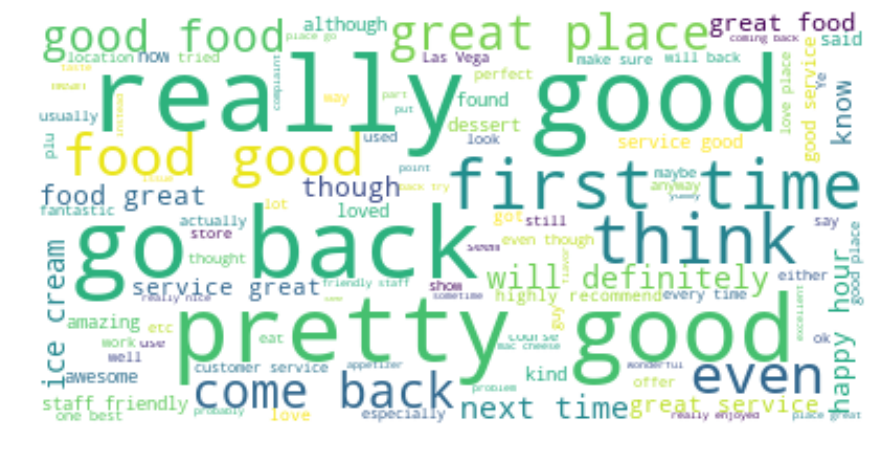

CPU times: user 6min 31s, sys: 7.72 s, total: 6min 39s
Wall time: 6min 38s


In [27]:
%%time
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(texts4)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

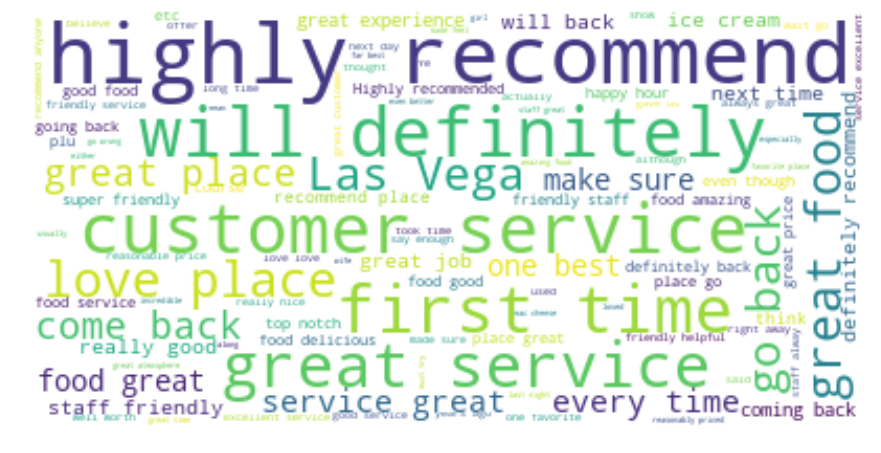

CPU times: user 10min 28s, sys: 15.1 s, total: 10min 43s
Wall time: 10min 41s


In [28]:
%%time
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(texts5)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

![title](5estrelas.PNG)

In [41]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [42]:
dataset['review stars'].shape

(1999982,)

In [43]:
%%time
X = dataset['text'].tolist()
y = dataset['business stars'].tolist()


_pipe = Pipeline([
    ('tfidf',TfidfVectorizer(stop_words='english',lowercase=True,analyzer='word',token_pattern=r'\w+')),
    ('linear', LinearRegression())
])
X_train, X_test, y_train, y_test = train_test_split(X, y)

_pipe.fit(X_train, y_train)
predict_linear = _pipe.predict(X_test)

CPU times: user 18h 37min, sys: 22h 44min 56s, total: 1d 17h 21min 57s
Wall time: 5h 32min 25s


![title](TfidfVectorizer.PNG)

In [44]:
print(mean_squared_error(y_test,predict_linear))

0.4832161175294534


In [45]:
%%time
_pipe_knr = Pipeline([
    ('tfidf',TfidfVectorizer(stop_words='english',lowercase=True,analyzer='word',token_pattern=r'\w+')),
    ('KNR', KNeighborsRegressor(n_neighbors=5))
])
_pipe_knr.fit(X_train, y_train)
predict_knr = _pipe.predict(X_test)

CPU times: user 4min 47s, sys: 2.05 s, total: 4min 49s
Wall time: 4min 49s


In [46]:
print(mean_squared_error(y_test,predict_knr))

0.4832161175294534
